In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OneHotEncoder

In [64]:
df = pd.read_csv("car_prices.csv")

Handling categorical data by using label encoder and one hot encoding 

In [65]:
label = LabelEncoder()
df['body'] = label.fit_transform(df['body'])
df['make'] = label.fit_transform(df['make'])
df['model'] = label.fit_transform(df['model'])
df['trim'] = label.fit_transform(df['trim'])
df = pd.get_dummies(df, columns=['transmission'])

Removing column that are not much important for training purpose 

In [66]:
df = df.drop(['vin', 'state', 'color', 'interior', 'seller', 'saledate', 'condition'], axis = 1)
df

,year,make,model,trim,body,odometer,mmr,sellingprice,transmission_Sedan,transmission_automatic,transmission_manual,transmission_sedan
0,2015,24,658,998,36,16639.0,20500.0,21500.0,0,1,0,0
1,2015,24,658,998,36,9393.0,20800.0,21500.0,0,1,0,0
2,2014,3,9,283,37,1331.0,31900.0,30000.0,0,1,0,0
3,2015,51,596,1399,37,14282.0,27500.0,27750.0,0,1,0,0
4,2014,3,42,498,37,2641.0,66000.0,67000.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,24,388,1052,37,18255.0,35300.0,33000.0,0,0,0,0
558833,2012,41,7,1109,11,54393.0,30200.0,30800.0,0,1,0,0
558834,2012,3,743,1945,36,50561.0,29800.0,34000.0,0,1,0,0
558835,2015,36,76,120,78,16658.0,15100.0,11100.0,0,1,0,0


fill missing values using mean 

In [67]:
df = df.fillna(df.mean())

check that there is null value or not 

In [68]:
count_null = df.isnull().sum()
print(count_null)

year                      0
make                      0
model                     0
trim                      0
body                      0
odometer                  0
mmr                       0
sellingprice              0
transmission_Sedan        0
transmission_automatic    0
transmission_manual       0
transmission_sedan        0
dtype: int64


In [69]:
from sklearn.model_selection import train_test_split

Y = df['sellingprice']
X = df.drop(['sellingprice'], axis = 1)
print(X.shape, Y.shape)

(558837, 11) (558837,)


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.01, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(553248, 11)
(5589, 11)
(553248,)
(5589,)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
model = LinearRegression()

In [72]:
model.fit(x_train, y_train)

LinearRegression()

Evaluate model using mean squared error and R-squared error

In [75]:
# Predict the target values for the training data
y_train_pred = model.predict(x_train)

# Predict the target values for the test data
y_test_pred = model.predict(x_test)

# Calculate MSE for the training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared for the training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE for the test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for the test data
r2_test = r2_score(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)
print("Test MSE:", mse_test)
print("Test R-squared:", r2_test)

Training MSE: 3079167.8850044366
Training R-squared: 0.9676095834177059
Test MSE: 3078425.6452367348
Test R-squared: 0.9671438961661439


Visualize the result

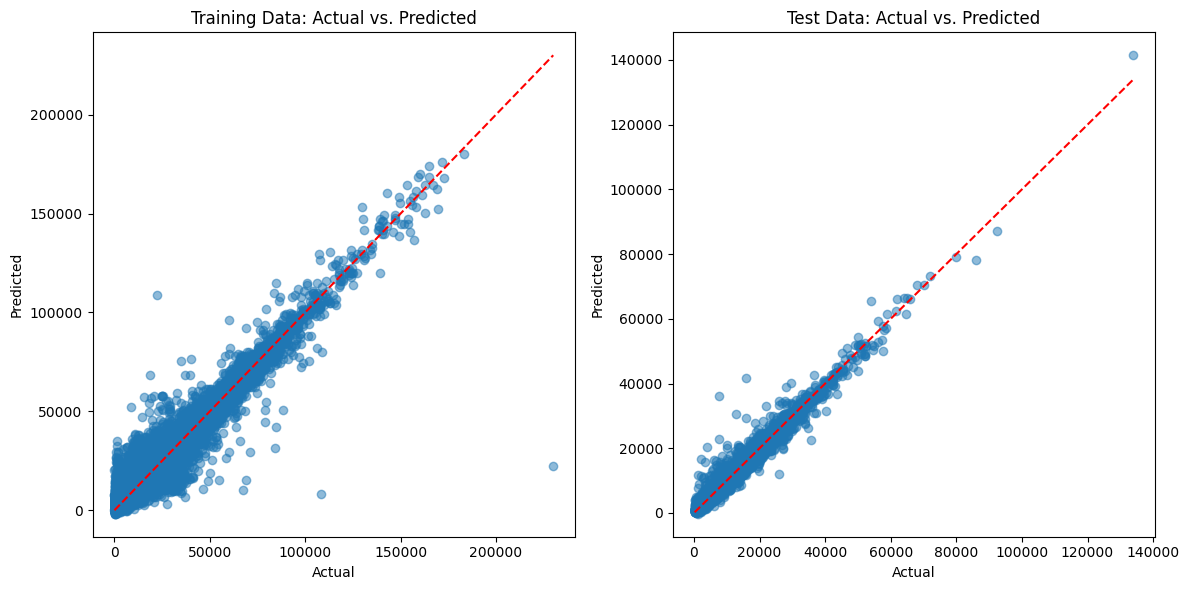

In [76]:
# Scatter plot for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs. Predicted')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs. Predicted')

plt.tight_layout()
plt.show()